In [289]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import shutil
import random

In [291]:
import os

dataset_path = r"C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset"

# Data Set and classes
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Sadece klasörleri al
        images = os.listdir(class_path)
        print(f"{class_name}: {len(images)} images")

Apple___Apple_scab: 72 images
Apple___Black_rot: 72 images
Apple___Cedar_apple_rust: 72 images
Apple___healthy: 72 images
Cherry___healthy: 72 images
Cherry___Powdery_mildew: 60 images
Pepper,_bell___Bacterial_spot: 84 images
Pepper,_bell___healthy: 72 images
Potato___Early_blight: 60 images
Potato___healthy: 60 images
Potato___Late_blight: 60 images
Strawberry___healthy: 60 images
Strawberry___Leaf_scorch: 84 images
Tomato___Bacterial_spot: 96 images
Tomato___Early_blight: 60 images
Tomato___healthy: 72 images
Tomato___Late_blight: 84 images
Tomato___Leaf_Mold: 108 images
Tomato___Septoria_leaf_spot: 324 images
Tomato___Spider_mites Two-spotted_spider_mite: 95 images
Tomato___Target_Spot: 59 images
Tomato___Tomato_mosaic_virus: 373 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 60 images


In [293]:
#Fixing pictures names, because there were space between names
def fix_filenames(directory):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img in os.listdir(class_path):
                old_path = os.path.join(class_path, img)
                
                # Yeni dosya adı: Boşlukları ve parantezleri kaldır
                new_filename = img.replace(" ", "_").replace("(", "").replace(")", "")
                new_path = os.path.join(class_path, new_filename)

                # Eğer dosya adı değişmişse yeniden adlandır
                if old_path != new_path:
                    os.rename(old_path, new_path)
                    print(f"✅ {img} → {new_filename}")


print("🎉 ALL PICTURES NAMES FİXED(SPACES REMOVED)")


🎉 ALL PICTURES NAMES FİXED(SPACES REMOVED)


#### In this step, I cleaned up the image filenames by removing spaces and special characters like parentheses.
#### This helps avoid path-related issues later during data loading and augmentation.
#### Now, all image names are consistent and safe to use.

# <span style="color:red">DATA AUGMENTATİON</span>

#### Augmentation was applied to the classes fewer data (except Tomato___Tomato_mosaic_virus',Tomato___Septoria_leaf_spot)

In [297]:
import os
import random
from PIL import Image, ImageEnhance, ImageFilter

base_dir = r'C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset'

exclude_classes = [
    'Tomato___Tomato_mosaic_virus', 
    'Tomato___Septoria_leaf_spot',
]

 
selected_classes = [cls for cls in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, cls)) and cls not in exclude_classes]


def augment_image(image_path, target_class_folder):
    img = Image.open(image_path)
    
    # ROTATİON
    img_rotated = img.rotate(random.randint(5, 25))  # RANDOMLY
    img_rotated.save(os.path.join(target_class_folder, "rotated_" + os.path.basename(image_path)))
    
    # FLİPPİNG
    img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
    img_flipped.save(os.path.join(target_class_folder, "flipped_" + os.path.basename(image_path)))
    
    # Brightness
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(1.5)  # Parlaklık artırma
    img_brightened.save(os.path.join(target_class_folder, "brightened_" + os.path.basename(image_path)))
    
    # Blurring
    img_blurred = img.filter(ImageFilter.GaussianBlur(radius=2))
    img_blurred.save(os.path.join(target_class_folder, "blurred_" + os.path.basename(image_path)))


for selected_class in selected_classes:
    class_path = os.path.join(base_dir, selected_class)
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    # Her dosya için veri artırma işlemi
    for file in files:
        file_path = os.path.join(class_path, file)
        augment_image(file_path, class_path)  # Yeni artırılmış dosyaları aynı klasöre kaydet


print("AUGMENTATİON HAS BEEN DONE.")


AUGMENTATİON HAS BEEN DONE.


#### In this part, I applied data augmentation to classes with fewer images (excluding a couple of strong-performing ones). For each image,
#### I created four variations: rotated, flipped, brightened, and blurred.
#### This helped me increase the dataset size and improve the model's ability to generalize, especially for underrepresented classes.

### I made this adjustment so that the model learns some classes better and others less, because all classes have roughly the same amount of data.

In [299]:
import os

dataset_path = r"C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset"

# Data Set and classes
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Sadece klasörleri al
        images = os.listdir(class_path)
        print(f"{class_name}: {len(images)} images")

Apple___Apple_scab: 360 images
Apple___Black_rot: 360 images
Apple___Cedar_apple_rust: 360 images
Apple___healthy: 360 images
Cherry___healthy: 360 images
Cherry___Powdery_mildew: 300 images
Pepper,_bell___Bacterial_spot: 420 images
Pepper,_bell___healthy: 360 images
Potato___Early_blight: 300 images
Potato___healthy: 300 images
Potato___Late_blight: 300 images
Strawberry___healthy: 300 images
Strawberry___Leaf_scorch: 420 images
Tomato___Bacterial_spot: 480 images
Tomato___Early_blight: 300 images
Tomato___healthy: 360 images
Tomato___Late_blight: 420 images
Tomato___Leaf_Mold: 540 images
Tomato___Septoria_leaf_spot: 324 images
Tomato___Spider_mites Two-spotted_spider_mite: 475 images
Tomato___Target_Spot: 295 images
Tomato___Tomato_mosaic_virus: 373 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 300 images


#### After augmentation, I checked the new image counts for each class. The underrepresented classes now have significantly more samples, which should help reduce class imbalance. 
#### This balanced dataset will likely lead to better overall model performance, especially for previously weaker classes.

In [301]:

def create_split_folders(class_name):
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split, class_name)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)

def split_data(class_name):
    class_dir = os.path.join(base_dir, class_name)
    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # shuffling the folders
    random.shuffle(files)

    # %70 training %15testing %15validation
    train_size = int(len(files) * 0.7)
    val_size = int(len(files) * 0.15)
    

    train_files = files[:train_size]
    val_files = files[train_size:train_size+val_size]
    test_files = files[train_size+val_size:]

  
    for file in train_files:
        shutil.move(os.path.join(class_dir, file), os.path.join(base_dir, 'train', class_name, file))
    for file in val_files:
        shutil.move(os.path.join(class_dir, file), os.path.join(base_dir, 'val', class_name, file))
    for file in test_files:
        shutil.move(os.path.join(class_dir, file), os.path.join(base_dir, 'test', class_name, file))

  

for selected_class in selected_classes:
    create_split_folders(selected_class)  # Klasörleri oluştur
    split_data(selected_class)  # Verileri böldür

print("The dataset has been successfully split into Training, Validation, and Test sets.")

The dataset has been successfully split into Training, Validation, and Test sets.


# CNN MODEL

In [329]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Normalization

# Loading Training Data
train_generator = val_test_datagen.flow_from_directory(
    r'C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset\train',  # Eğitim verisi yolu
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical')  

# Loading Validation Data
validation_generator = val_test_datagen.flow_from_directory(
    r'C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset\val',  # Doğrulama verisi yolu
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical') 

# Loading Test data
test_generator = val_test_datagen.flow_from_directory(
    r'C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset\test',  # Test verisi yolu
    target_size=(128, 128), 
    batch_size=32,
    class_mode='categorical')  



Found 5361 images belonging to 21 classes.
Found 1150 images belonging to 21 classes.
Found 1159 images belonging to 21 classes.


 ### 5361 images belonging  Training Classes. 
### 1150 images belonging  Testing Classes.
### 1159 images belonging  Validation Clases.

In [333]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creating Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(21, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\erank\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [335]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,  # Should be same with array_style
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


C:\Users\erank\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 78s 446ms/step - accuracy: 0.0730 - loss: 3.0324 - val_accuracy: 0.3348 - val_loss: 2.2350
Epoch 2/25
  1/167 ━━━━━━━━━━━━━━━━━━━━ 40s 244ms/step - accuracy: 0.4062 - loss: 2.2170

C:\Users\erank\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 2.2170 - val_accuracy: 0.2667 - val_loss: 2.2608
Epoch 3/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - accuracy: 0.3708 - loss: 2.1078 - val_accuracy: 0.6143 - val_loss: 1.3342
Epoch 4/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5000 - loss: 1.5655 - val_accuracy: 0.6333 - val_loss: 1.4209
Epoch 5/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 49s 296ms/step - accuracy: 0.5245 - loss: 1.5042 - val_accuracy: 0.6991 - val_loss: 0.9839
Epoch 6/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6250 - loss: 1.2502 - val_accuracy: 0.6667 - val_loss: 1.1736
Epoch 7/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 281ms/step - accuracy: 0.6229 - loss: 1.1665 - val_accuracy: 0.7821 - val_loss: 0.7088
Epoch 8/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.7188 - loss: 0.7025 - val_accuracy: 0.7667 - val_loss: 0.8704
Epoch 9/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 44s 266ms/step - accuracy: 0.6955 - loss: 0.9779 - val_accur

In [337]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.9289 - loss: 0.2666
Test Accuracy: 0.9184


#### After training the model, I tested it on the unseen test set and achieved a test accuracy of 91.84%, 
#### which is a big improvement compared to the previous notebook, where the accuracy was only 71.52%. 
#### The model also reached a training accuracy of 92.89% with a low loss value, showing that the data augmentation and class balancing steps were very effective. 
#### This confirms that increasing the number of images for underrepresented classes helped the model generalize better and perform more accurately across all classes.

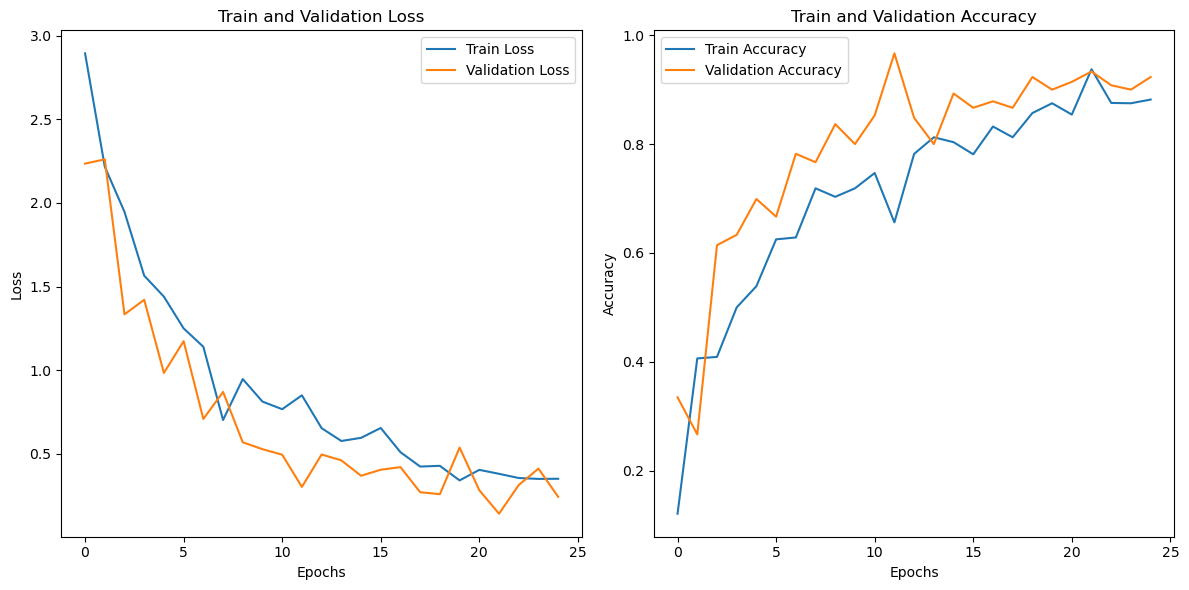

In [345]:
import matplotlib.pyplot as plt

# Loss grafiği
plt.figure(figsize=(12, 6))

# Trainig and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

The training and validation curves reveal that the model achieved consistent improvements in both loss reduction and classification accuracy. The validation accuracy even exceeded training accuracy in several epochs, suggesting strong generalization and robustness. Additionally, the lack of divergence between training and validation loss indicates minimal overfitting. These learning dynamics confirm that the revised CNN architecture, combined with data augmentation and class balancing, provided a well-regularized and high-performing model.

# <span style="color:red">PREDİCTİON</span>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


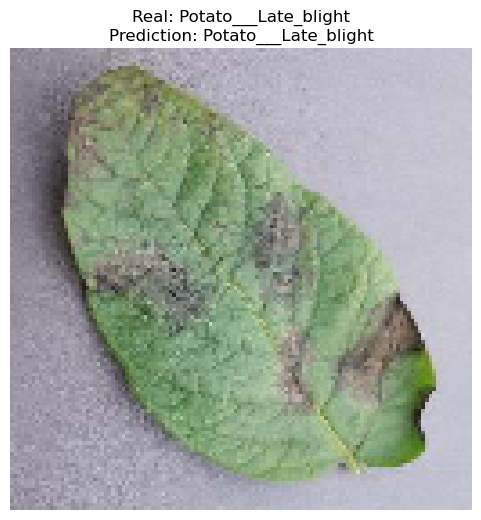

In [359]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Path
img_path = r'C:\Users\erank\OneDrive\Masaüstü\Sem2_Ca1\msc-da-integrated-ca1-sem2-cct2024534\plant_dataset\test\Potato___Late_blight\image (42).jpg'

# Real Class
true_class = os.path.basename(os.path.dirname(img_path))  

# Normalize imagee
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalizasyon (0-1 arası)
img_array = np.expand_dims(img_array, axis=0)  # Modelin beklediği giriş formatı

# Model predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]


class_names = list(train_generator.class_indices.keys())
predicted_class_name = class_names[predicted_class_index]  # Modelin tahmin ettiği sınıf adı

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Eksenleri kapat

# Başlık olarak hem Gerçek hem de Tahmin edilen sınıfı yazdır
plt.title(f"Real: {true_class}\nPrediction: {predicted_class_name}", fontsize=12, color="black")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━

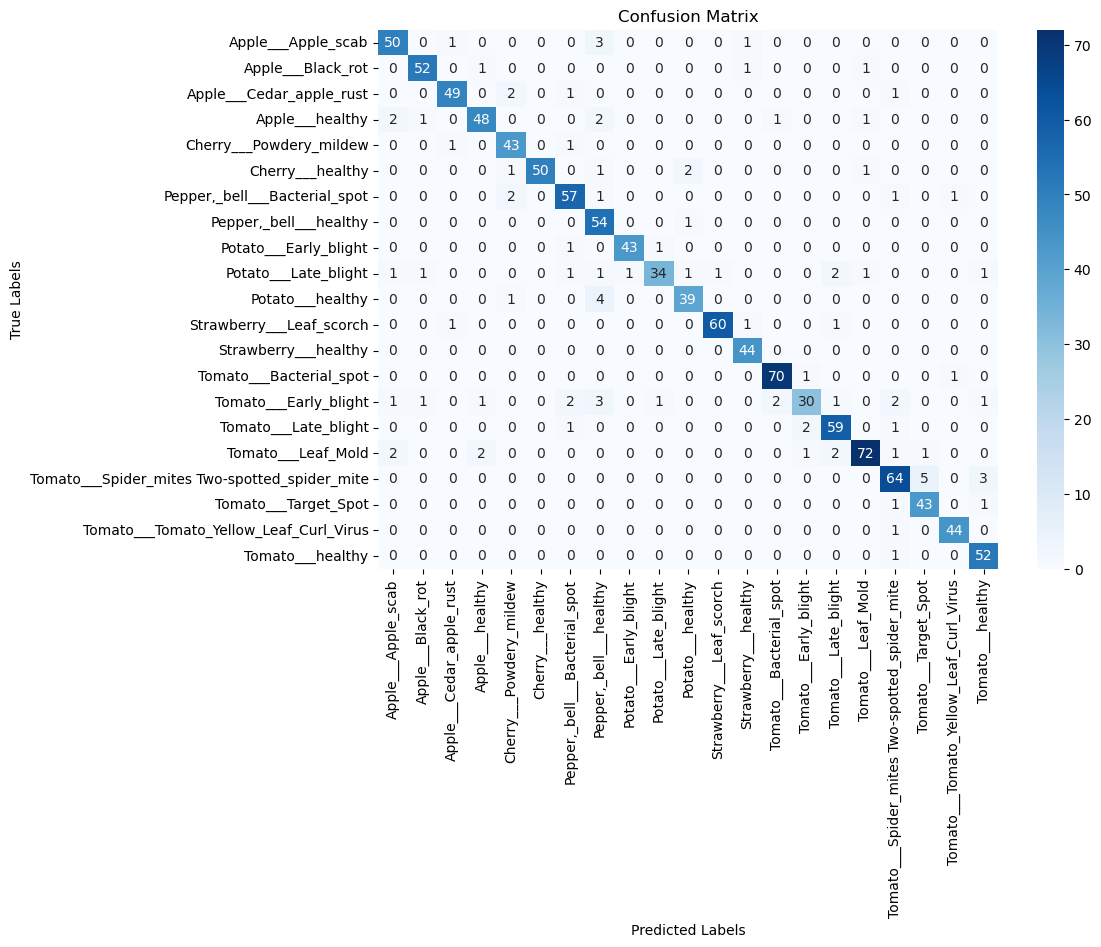

In [363]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Test verisi üzerinde tahminler yapalım
y_true = []  # Gerçek etiketler
y_pred = []  # Modelin tahminleri

# Test verisi üzerinden geçiyoruz
for i in range(test_generator.samples // test_generator.batch_size):
    x_batch, y_batch = next(test_generator)  # Test batch'ini al
    y_true.extend(np.argmax(y_batch, axis=1))  # Gerçek etiketleri al
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))  # Modelin tahminlerini al

# Confusion matrix hesaplama
cm = confusion_matrix(y_true, y_pred)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
